We start by importing the libraries required

In [1]:
import numpy as np 
import math
import matplotlib.pyplot as plt
import pandas as pd

We are going to find the solution y to the initial value problem

 $$y'= f(x,y(x))$$ with $$y(a)=y0$$ 

where:
<br>
• N= $ \frac{b-a}{h}$

<br>
In this problem, the inital value problem is given by
$$y'= -(y+1)(y+3)$$
$$y(0)=-2$$

For which the exact solution is 
$$y=-3+ \frac{2}{1+e^{-2x}}$$

in the interval [0,10]. Thus, we are going to implement the 2-step method given by
$$y_{n+1} = y_{n} +\frac{h}{2}[3f(x_{n},y_{n}) - f(x_{n-1},y_{n-1})] $$

To find the approximated solutions.


<br>
<br>
So firstly, we need to define the time step (h), initial value ($y_{0}$),and $y'=f$

In [2]:
#time step
h = 0.01   
              
#initial value
y0=-2        
                        
#y'(x)                    
f = lambda x: -(x+1)*(x+3)

Since we know that the time step is h=0.01, we can compute N

In [3]:
#number of points
N=(10-0)/0.01
N

1000.0

Since N=1000 and there are N+1 points including the initial points, there are a total of 1001 discrete time points in the interval [0,10]

In [4]:
#discrete time points in a straight line for h = 0.01
X= np.linspace(0,10,1001)
X

array([ 0.  ,  0.01,  0.02, ...,  9.98,  9.99, 10.  ])

Now, we will compute the approximated solutions using the 2-step method

$$y_{n+1} = y_{n} +\frac{h}{2}[3f(x_{n},y_{n}) - f(x_{n-1},y_{n-1})] $$

If we take n=0, then $$y_{1} = y_{0} +\frac{h}{2}[3f(x_{0},y_{0}) - f(x_{-1},y_{-1})] $$

However, we know that $f(x_{-1},y_{-1})$ is not possible. <br>
Thus, instead of the 2-step method, we can use the Euler Method to calculate $y_{1}$.

<br>
<center> Euler Method
$$y_{n+1}= y_{n} + hf(y_{n})$$

In [5]:
#Euler Method for n=0

y1= -2+ h* f(-2)

y1

-1.99

Now that we have $y_{1}$, we can continue to use the 2-step method to calculate the rest of the approximation.

In [6]:
#2-step method
n=1

#we begin by creating an array with the known values which are y0 and y1
yn=[y0,y1]

#our y' function
f = lambda x: -(x+1)*(x+3)

#approximate using 2-step method using for loop
for i in range(1,1000): 
    yn1= yn[i] + h/2 *(3*f(yn[i])-f(yn[i-1]))
    yn.append(yn1)
    
yn

[-2,
 -1.99,
 -1.9800015,
 -1.9700069991000337,
 -1.9600184931015672,
 -1.9500379730144604,
 -1.9400674234720985,
 -1.930108821157335,
 -1.9201641332418888,
 -1.910235315841804,
 -1.9003243124915292,
 -1.8904330526391233,
 -1.8805634501650317,
 -1.870717401926809,
 -1.8608967863320949,
 -1.8511034619420632,
 -1.841339266107484,
 -1.8316060136394456,
 -1.8219054955166851,
 -1.8122394776313806,
 -1.8026096995751468,
 -1.7930178734668734,
 -1.7834656828239268,
 -1.7739547814781296,
 -1.764486792537804,
 -1.755063307397058,
 -1.7456858847933614,
 -1.7363560499143451,
 -1.7270752935546299,
 -1.7178450713233704,
 -1.7086668029030767,
 -1.6995418713601549,
 -1.6904716225074876,
 -1.681457364319256,
 -1.6725003663980869,
 -1.6636018594944955,
 -1.6547630350784819,
 -1.6459850449630273,
 -1.6372690009791337,
 -1.6286159747019446,
 -1.62002699722739,
 -1.6115030589986976,
 -1.603045109682028,
 -1.5946540580904014,
 -1.5863307721550033,
 -1.5780760789428785,
 -1.5698907647199523,
 -1.561775575058

Now we compute the exact solution
$$y=-3+ \frac{2}{1+e^{-2x}}$$

In [7]:

#exact sol
y= lambda x: -3 + 2/(1+ np.exp(-2*x))
Y= [y(d) for d in X]

Y

[-2.0,
 -1.9900003333200005,
 -1.980002666240069,
 -1.97000899676118,
 -1.9600213196888363,
 -1.95004162504212,
 -1.9400718964708565,
 -1.930114109683571,
 -1.9201702308888686,
 -1.9102422152528398,
 -1.900332005375044,
 -1.8904415297855703,
 -1.8805727014656142,
 -1.8707274163939416,
 -1.860907552121542,
 -1.851114966376682,
 -1.841351495702501,
 -1.8316189541291852,
 -1.8219191318826697,
 -1.8122537941317145,
 -1.802624679775096,
 -1.7930335002705473,
 -1.7834819385069713,
 -1.773971647721329,
 -1.764504250461502,
 -1.7550813375962908,
 -1.7457044673736088,
 -1.7363751645277967,
 -1.7270949194368672,
 -1.7178651873303659,
 -1.7086873875484092,
 -1.6995629028523458,
 -1.6904930787873615,
 -1.681479223097229,
 -1.6725226051912945,
 -1.6636244556636677,
 -1.6547859658644792,
 -1.646008287522954,
 -1.6372925324219487,
 -1.6286397721234922,
 -1.620051037744775,
 -1.6115273197839388,
 -1.6030695679949225,
 -1.594678691310537,
 -1.5863555578128647,
 -1.5781009947499922,
 -1.5699157885980204

Now that we have both the exact solution and the approximated values, we can now plot them in one graph

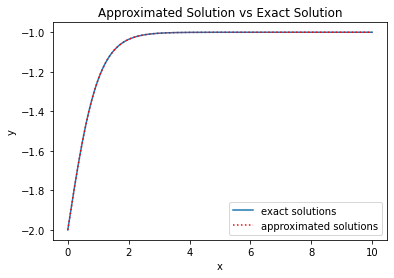

In [8]:
plt.plot(X,Y,label='exact solutions') #exact sol
plt.plot(X,yn,color='r', linestyle=':',label='approximated solutions') #approximated

plt.xlabel('x')
plt.ylabel('y')
plt.title('Approximated Solution vs Exact Solution')
plt.legend()

From the graph, we can see how close the approximations are to the exact solutions. To further see how accurate the approximations are, we are going to compute the absolute error.

error= $|y_{exact}-y_{approximate}|$

In [9]:
#abs error where Y is the array consisting of the exact solution
# and yn consist of the approximate solution
er= np.abs(np.array(Y)-np.array(yn))

Now, to create a table, the panda library will be used to generate a table consisting of all the points, including the approximation values, the exact values and the absolute value error that we have calculated.

In [10]:
#to display all the 1001 points
pd.set_option('display.max_rows', None)

#generating the table
data = {'x': X,
        'Numerical Approximations': yn,
        'Exact Solutions': Y,
        'Absolute Value Error  in [0,10]': er}
df = pd.DataFrame(data)
df

,x,Numerical Approximations,Exact Solutions,"Absolute Value Error in [0,10]"
0,0.00,-2.000000,-2.000000,0.000000e+00
1,0.01,-1.990000,-1.990000,3.333200e-07
2,0.02,-1.980001,-1.980003,1.166240e-06
3,0.03,-1.970007,-1.970009,1.997661e-06
4,0.04,-1.960018,-1.960021,2.826587e-06
5,0.05,-1.950038,-1.950042,3.652028e-06
6,0.06,-1.940067,-1.940072,4.472999e-06
7,0.07,-1.930109,-1.930114,5.288526e-06
8,0.08,-1.920164,-1.920170,6.097647e-06
9,0.09,-1.910235,-1.910242,6.899411e-06
